In [1]:
import pandas as pd
import pathlib

models=[
    #'mlp_individual_mean',
    'mlp_mo',
    #'agg_mlp_individual_mean',
    'agg_mlp_mo',
    'agg_mlp_dense_mo',
]

labels={
    #'mlp_individual_mean': 'ind',
    'mlp_mo': 'mo',
    #'agg_mlp_individual_mean': 'agg_ind',
    'agg_mlp_mo': 'agg_mo',
    'agg_mlp_dense_mo': 'aggd_mo',
}

def get_error(ds):
    datapath=f'../data/grupos/{ds}/'
    restulspath=f'../results/{ds}/'


    # Load data
    groups = {}

    fromngroups=2
    tongroups=10

    # Group mean as 'y'
    for g in range(fromngroups,tongroups+1):
        data_group = pd.read_csv(f"{datapath}groups-{g}-test.csv")
        groups[g] = data_group #pd.DataFrame(data_group.filter(regex="rating").mean(axis=1), columns=['y'])
        groups[g]['g'] = g

    # Load model predictions
    for g in range(fromngroups,tongroups+1):
        for model in models:
            groups[g][model] = pd.read_csv(
                f"{restulspath}groups-{g}-{model}.csv",
                header=0,
                names=["data"]
            )['data']

    # Compute error
    for g in range(fromngroups,tongroups+1):    # Each group
        for m in models:                        # Each model
            for gi in range(1,g+1):             # Each rating in group
                groups[g][m+'-error-'+str(gi)] = abs(groups[g]['rating-'+str(gi)] - groups[g][m])
                groups[g][m+'-error2-'+str(gi)] = (groups[g]['rating-'+str(gi)] - groups[g][m])**2

    for g in range(fromngroups,tongroups+1):    # Each group
        for m in models:                        # Each model
            groups[g][m+'-ERROR'] = groups[g].filter(regex='^'+m+'-error-',axis=1).mean(axis=1, skipna=True)
            groups[g][m+'-ERROR2'] = groups[g].filter(regex='^'+m+'-error2-',axis=1).mean(axis=1, skipna=True)
    
    # Join dict of groups
    results = pd.concat(groups, join='inner', ignore_index=True)
    # Calculate means
    means = results.groupby('g').mean()

    return means

#DS='ml1m'
#DS='ft'
#DS='anime'
#DS='netflix'

In [2]:
import matplotlib.pyplot as plt

def graph_mae(means):
    #plot each series
    SUBFIX='-ERROR'
    for m in models:
        plt.plot(means[m+SUBFIX], label=labels[m])
    plt.legend(title='model')
    plt.show()

def graph_mse(means):
    #plot each series
    SUBFIX='-ERROR2'
    for m in models:
        plt.plot(means[m+SUBFIX], label=labels[m])
    plt.legend(title='model')
    plt.show()

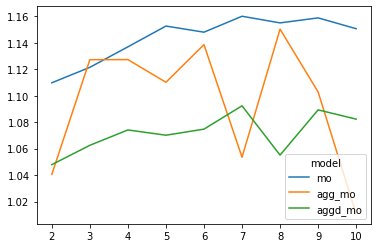

In [3]:
means = get_error('ml1m')
graph_mse(means)

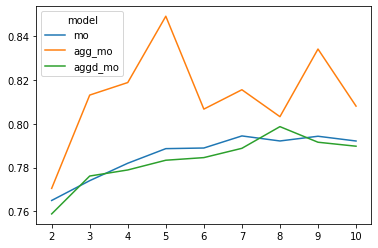

In [4]:
means = get_error('ml1m')
graph_mae(means)

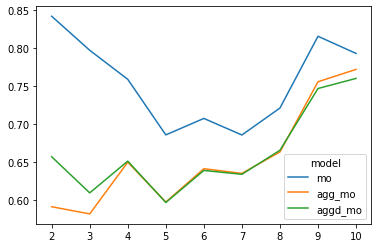

In [5]:
means = get_error('ft')
graph_mse(means)

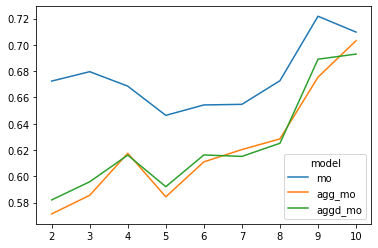

In [6]:
means = get_error('ft')
graph_mae(means)